In [19]:
s=100

In [20]:
import networkx as nx
g=nx.barabasi_albert_graph(s,6)

In [21]:
from matplotlib.backends.backend_pdf import PdfPages
from collections import defaultdict
import matplotlib.pyplot as plt
import random as r
import time
import numpy as np
class network:
    def __init__(self,s):
        self.size=s #size of network
        self.g1=g #s nodes each of degree 3
        #self.g1.to_undirected()
        self.beta=0.5
        self.lamb=0.2 #probability of generation at each node
        #self.mean=3
        self.queue=defaultdict(list)#queue at each node.Each key in this dict is associated with a list of tuples
        #like (serial no of run, destination node)
        self.packets=0 #no of packets in the network
        self.centralities=nx.betweenness_centrality(self.g1)#dictionary of centralities of the network
        self.linkbw=0 #link bandwidth
        self.counter=0 #serial no of run
        self.node_bw=[]
    def sendPacket(self,source,dest):#sends packet one step towards the destination
        path=nx.shortest_path(self.g1,source,dest) #shortest path from source to destination
        if len(path)>1:#if such a path exists
            if(dest==path[1]): #if the destination is the next in the path
                self.packets-=1 #packet delivered so no of packets in the node is decreased by one 
            else:
                self.queue[path[1]].insert(0,(self.counter,dest)) # otherwise inserts the packet into the queue 
                #of the next node in the path
    def simulate(self): #generates packets and routes the existing packets towards their dest.
        for i in range(self.size): #routes from the queues first... guess why?
                    c=self.node_bw[i] #calculate the processing capacity of node i
                    pass_on=c
                    prob=pass_on-int(pass_on) #calculate probabilty that the last packet is sent 
                    pass_on=int(pass_on) #no of packets which would certainly be sent
                    #popped from one queue ..sent to next
                    oho=self.queue[i] 
                    #print(len(oho))
                    for k in range(pass_on):
                        z=len(oho)
                        #print(z)
                        if(z!=0):
                            if(self.counter!=oho[z-1][0]): #important to ensure that the same packet
                                # does not move more than one step in a run
                                x=oho.pop() 
                                self.sendPacket(i,x[1])
                    z=len(oho)
                    if(z!=0):
                        if(r.random()<prob):
                            if(self.counter!=oho[z-1][0]):
                                x=oho.pop()
                                self.sendPacket(i,x[1])
                        self.queue[i]=oho
        for i in range(self.size): #genearates packets
            if(r.random()<=self.lamb):
                self.packets+=1
                j=r.randrange(0,self.size)
                if i==j:
                    if j!=0:
                        j-=1
                    else:
                        j+=1
                self.sendPacket(i,j)
        """for i in range(self.size): #genearates packets
            self.lamb=0
            while(self.lamb==0):
                self.lamb=np.random.poisson(self.mean)
            #print("Lambda =",self.lamb)
            j=r.randrange(0,self.size)
            for k in range(self.lamb):
                    self.packets+=1
                    self.sendPacket(i,j)"""
        self.counter+=1
def frange(start, stop, step): #yields fractional numbers in steps to caller
    i = start
    while i < stop:
        yield i
        i += step
            

    



In [22]:
s=100
n=network(s)
mcn=0
hc=0
bw=[]
it=[]
for no in n.g1.nodes():
    if(n.centralities[no]>hc):
        hc=n.centralities[no]
        mcn=no



In [23]:
Kp=0.00002
n.queue=defaultdict(list)
Kd=0.5
it=[]
bw=[]
le=[]
lerror=[0]*n.size
n.node_bw=[]
mark=[0]*n.size
for i in range(s):
    n.node_bw.append(0)
for i in range(1000):
    n.simulate()
    count=0
    for j in n.g1.nodes():
        if(mark[j]==10):
            n.queue=defaultdict(list)
            n.packets=0
            
            #for k in range(10):
                #n.simulate()
        error=len(n.queue[j])
        n.node_bw[j]+=Kp*error
        change=error-lerror[j]
        #lerror=0-len(n.queue[j])
        if(error>0 and change>0):
            mark[j]=0
            count+=1
        elif(change<0):
            mark[j]+=1
        lerror[j]=error
    le.append(len(n.queue[mcn]))
    it.append(i)
    bw.append(n.node_bw[mcn])
    #print(i," ",count)


In [24]:
sum=0
last_packets=0
n.queue=defaultdict(list)
n.packets=0
for i in range(2000):
    n.simulate()
    if(i>500):
        diff=n.packets-last_packets
        sum+=diff
    last_packets=n.packets
mean_change=sum/500
order_param=mean_change/n.lamb


2.1599999999999997
[2.533699999999997, 0.033380000000000035, 3.738799999999997, 0.6762200000000042, 2.0950400000000005, 0.47312000000000126, 2.6072399999999996, 1.5980199999999853, 1.587379999999983, 2.0613400000000075, 0.3356400000000021, 0.6376800000000042, 0.4787400000000025, 0.7217000000000056, 0.2238199999999995, 0.31118000000000196, 0.786180000000003, 0.6657400000000049, 0.1054200000000003, 0.07448000000000009, 0.032299999999999884, 0.0216, 0.2979200000000016, 0.12036000000000051, 0.06095999999999995, 0.3200600000000021, 0.09978000000000044, 0.021699999999999997, 0.03266000000000007, 0.09078000000000012, 0.1684199999999992, 0.10870000000000057, 0.22239999999999965, 0.4351200000000021, 0.4873800000000026, 0.5042800000000037, 0.17945999999999954, 0.0, 0.3405800000000015, 0.25720000000000126, 0.08942000000000046, 0.22077999999999962, 0.12304000000000052, 0.1107600000000003, 0.1694199999999998, 0.030759999999999947, 0.09122000000000031, 0.05350000000000013, 0.03264000000000004, 0.118

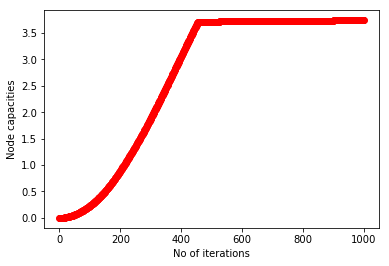

In [25]:
print(order_param)
print(n.node_bw)
print(n.centralities)
plt.plot(it,bw,"ro")
plt.xlabel('No of iterations')
plt.ylabel('Node capacities')
plt.show()

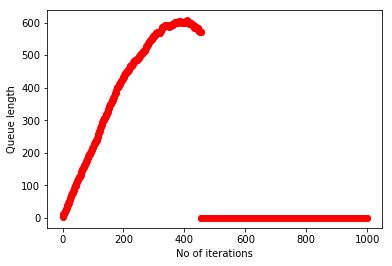

In [26]:
plt.plot(it,le,"ro")
#plt.axis([])
plt.xlabel('No of iterations')
plt.ylabel('Queue length')
plt.savefig('test.jpeg',dpi=900)
plt.show()

0.28219140000000015


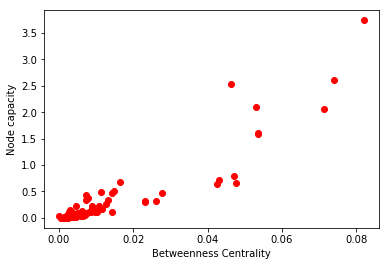

In [27]:
cen=[]
for i in range(s):
    cen.append(n.centralities[i])
sum=0
for i in range(s):
    sum+=n.node_bw[i]
avg=sum/s
print(avg)
plt.plot(cen,n.node_bw,"ro")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Node capacity")
plt.show()

In [28]:
"""from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a * np.exp(b * x) - c
popt, pcov = curve_fit(func, cen, n.node_bw)"""

'from scipy.optimize import curve_fit\ndef func(x, a, b, c):\n    return a * np.exp(b * x) - c\npopt, pcov = curve_fit(func, cen, n.node_bw)'

In [29]:
#print(popt)
#print(pcov)

In [30]:
"""def func1(x,a):
    return x*a
popt1, pcov1 = curve_fit(func1, cen, n.node_bw)
print(popt1)
print(pcov1)"""

'def func1(x,a):\n    return x*a\npopt1, pcov1 = curve_fit(func1, cen, n.node_bw)\nprint(popt1)\nprint(pcov1)'

In [31]:
"""import matplotlib.pyplot as plt
y=[]
for i in range(s):
    y.append(func1(n.centralities[i],popt[0]))
plt.plot(cen,y,"ro")
plt.show()"""

'import matplotlib.pyplot as plt\ny=[]\nfor i in range(s):\n    y.append(func1(n.centralities[i],popt[0]))\nplt.plot(cen,y,"ro")\nplt.show()'

In [32]:


a=[]
it=[]
params=[]
lamb=[]
for k in frange(0.05,1,0.05):
    sum=0
    last_packets=0
    n.packets=0
    n.queue=defaultdict(list)
    n.lamb=k
    lamb.append(k)
    for i in range(1000):
        n.simulate()
        if(i>500):
            it.append(i)
            diff=n.packets-last_packets
            sum+=diff
            a.append(len(n.queue[mcn]))
        last_packets=n.packets
    mean_change=sum/500
    order_param=mean_change/n.lamb
    params.append(order_param)
    
    #print(order_param)

In [33]:
#plt.plot(it,a,"ro")
#plt.show()

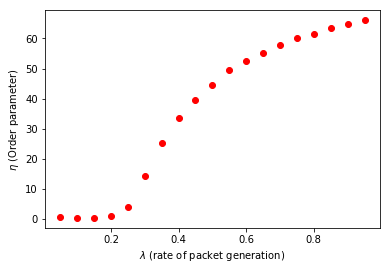

In [34]:
plt.plot(lamb,params,"ro")
plt.xlabel(r'$\lambda$'' (rate of packet generation)')
plt.ylabel(r'$\eta$'' (Order parameter)')
plt.show()